Analizirali bomo podatke o SAT rezultatih na srednjih šolah v New York-u.

SAT je standardizirani test (kot naša matura). Test opravijo vsi srednješolci in na podlagi rezultata se univerze odločajo glede sprejema oziroma zavrnitve vpisa študenta.

Uprašanja kera imamo so:
* Ali so bolj uspešni razredi z več ali z manj otroki.
* Kateri kriteriji korelirajo z SAT rezultati
* * ell_per - English language learners - procent otrok v razredu, ki se uči angleški jezik
* * white_per - procent belih otrok
* * black_per - procent črnih otrok
* * asian_per - procent azijskih otrok
* * hispanic_per - procent južnoameriških otrok

## Uvoz podatkov

sat_results_2012.csv hrani podatke o doseženih SAT rezultatih v letu 2012
> V letu 2012 je bil test sestavljen iz 3 sklopov: "Critical readig", "Math" ,"Writing". Vsak sklop je bil vreden od 0 do 800 točk, skupaj 2400 točk.


class_size_2010_2011.csv hrani podatke o velikosti razredov šol v letih 2010/2011 (ni ista letnica, vendar bomo operirali s temi podatki).
> 9-12 razred pri njih pomeni High School

demographics_2006_2012.csv hrani podatke o sestavi razredo od leta 2006 do 2012.

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Uvozite podatke. 
</div>

In [4]:
import os
cwd = os.getcwd()
cwd

'/home/klement/analitika2/work_dir/01_Ponovitev'

In [7]:
with open("neki.txt", "w") as f:
    f.write("nekie neki")

In [18]:
import pandas as pd

sat_results =pd.read_csv('./datasets/NYE_SAT_scores_Predavanje_01/sat_results_2012.csv', delimiter=";")
class_size =pd.read_csv('./datasets/NYE_SAT_scores_Predavanje_01/class_size_2010_2011.csv', delimiter=";")
demographics =pd.read_csv('./datasets/NYE_SAT_scores_Predavanje_01/demographics_2006_2012.csv', delimiter=",")

In [19]:
sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


## Cleaning datasets

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Preglejte sat_results dataset.
Prikažite prvih 10 vrstic in izpišite osnovne informacije o datasetu (imena stolpcev, število vrstic, datatip stolpca)
</div>


In [20]:
sat_results.head(10)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387


In [21]:
sat_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
    Ustvarite nov stolpec <i>SAT Avg. Score</i> in vanj shranite seštevek vseh treh stolpcev.
Vrstice z nepravilnimi vrednostmi odstranite.
</div>


In [ ]:
#sat_results['SAT_Avg'] = fsat_results['SAT Critical Reading Avg. Score']+sat_results['SAT Math Avg. Score ']+sat_results['SAT Writing Avg. Score ]

In [23]:
for col in ["SAT Critical Reading Avg. Score","SAT Math Avg. Score", "SAT Writing Avg. Score" ]:
    sat_results[col]=pd.to_numeric(sat_results[col], errors="coerce")

In [24]:
sat_results[sat_results["SAT Critical Reading Avg. Score"].isnull()].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
22,02M392,MANHATTAN BUSINESS ACADEMY,s,NaN,NaN,NaN
23,02M393,BUSINESS OF SPORTS SCHOOL,s,NaN,NaN,NaN
25,02M399,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,s,NaN,NaN,NaN
38,02M427,MANHATTAN ACADEMY FOR ARTS & LANGUAGE,s,NaN,NaN,NaN
40,02M437,HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES,s,NaN,NaN,NaN


In [25]:
sat_results=sat_results[sat_results["SAT Critical Reading Avg. Score"].notnull()]

In [28]:
sat_results["SAT_Avg_Score"]=sat_results["SAT Critical Reading Avg. Score"]+sat_results["SAT Math Avg. Score"]+sat_results["SAT Writing Avg. Score"]

In [29]:
sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT_Avg_Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Izpišite prvih 5 vrstica class_size dataseta in izpišite osnovne informacije.</div>

In [48]:
class_size.head(5)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
225,1,M,NaN,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63,3.0,21.0,19.0,25.0,STARS,NaN
226,1,M,NaN,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79,3.0,26.3,24.0,31.0,STARS,NaN
227,1,M,NaN,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38,2.0,19.0,16.0,22.0,STARS,NaN
228,1,M,NaN,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69,3.0,23.0,13.0,30.0,STARS,NaN
229,1,M,NaN,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53,3.0,17.7,16.0,21.0,STARS,NaN


In [75]:
class_size =pd.read_csv('./datasets/NYE_SAT_scores_Predavanje_01/class_size_2010_2011.csv', delimiter=";")
class_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int64  
 1   BOROUGH                               27611 non-null  object 
 2   SCHOOL CODE                           27611 non-null  object 
 3   SCHOOL NAME                           27611 non-null  object 
 4   GRADE                                 26127 non-null  object 
 5   PROGRAM TYPE                          26127 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  object 
 10  NUMBER OF SECTIONS                    26127 non-null  float64
 11  AVERAGE CLASS S

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
V class_size datasetu obdržite le vrstice, ki se nanašajo na High School (vrednost 09-12 v GRAD stolpcu).
</div>

In [32]:
class_size_school=class_size[9:13]

In [35]:
filter_=class_size["GRADE "]=="09-12"
class_size=class_size[filter_]

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Da bomo kasneje združili class_size in sat_results dataseta potrebujemo edinstven ključ po katerem ju bomo združili. Ta ključ je vrednost DBN (identifikacijska številka šole). DBN vrednosti v class_sizes ni, vendar pa jo lahko ustvarimo s pomočjo CSD in SCHOOL CODE stolpcev.
    
CSD vrednost mora biti 2-mestna številka kateri nato dodamo SCHOOL CODE.
</div>

In [50]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN


In [37]:
class_size["GRADE "].value_counts()

09-12    10644
Name: GRADE , dtype: int64

In [76]:
def zero_padded(x):
    return f"{x:02}"
    

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
V class_size datasetu imamo tudi več različnih programov poučevanja. Za naše potrebe želimo obdržati le GEN ED program.
</div>

In [77]:
zero_padded(12)

'12'

In [78]:
class_size["CSD_padded"]=class_size["CSD"].apply(zero_padded)

In [79]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,CSD_padded
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN,01
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN,01


In [80]:
class_size["DBN"]=class_size["CSD_padded"]+class_size["SCHOOL CODE"]

In [81]:
filter2=class_size["PROGRAM TYPE"]=="GEN ED"

In [82]:
class_size=class_size[filter2]

In [83]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,CSD_padded,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12,1.0,12.0,12.0,12.0,ATS,NaN,01,01M015
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26,2.0,13.0,12.0,14.0,ATS,NaN,01,01M015


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
V class_size še vedno nimamo edinstvenega ključa, saj je vsak razred prikazan kot svoja vrstica.
    
Ustvarite nov DataFrame, ki ima stolpca "DBN" in "AVERAGE CLASS SIZE".
DBN naj ima "unique" DBN vrednost, AVERAGE CLASS SIZE pa pridobite tako, da vzemete vse povprečne velikosti razredov za isto šolo in pridobite povprečno vrednost.

Pomagate si lahko s funckijo <i>groupby()</i>
</div>

In [84]:
class_size_groupby=class_size.groupby("DBN")
class_size_groupped=class_size_groupby["AVERAGE CLASS SIZE"].mean()
class_size_groupped=class_size_groupped.reset_index()
class_size_groupped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DBN                 1481 non-null   object 
 1   AVERAGE CLASS SIZE  1481 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.3+ KB


In [98]:
sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT_Avg_Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [99]:
df=sat_results.merge(class_size_groupped, how="inner", on="DBN")

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT_Avg_Score,AVERAGE CLASS SIZE
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,21.891304
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,22.231250
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,18.790476
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,23.000000
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,23.571429
...,...,...,...,...,...,...,...,...
398,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348.0,353.0,334.0,1035.0,22.760000
399,32K552,ACADEMY OF URBAN PLANNING,67,342.0,364.0,354.0,1060.0,23.900000
400,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,465.0,422.0,1315.0,20.937931
401,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347.0,358.0,350.0,1055.0,25.060000


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Združite sat_results in novo pridobljen dataframe, tako da obdržite vrstice, ki imajo ne-nično vrednost. Prikažite v grafu odvisnost SAT rezultatov od povprečne velikosti razreda.
</div>

In [101]:
import matplotlib.pyplot as plt


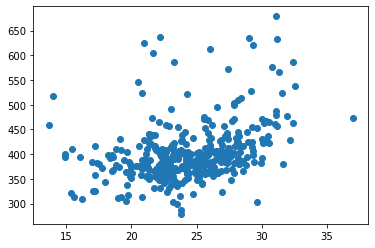

In [102]:
plt.scatter(df["AVERAGE CLASS SIZE"], df["SAT Critical Reading Avg. Score"])


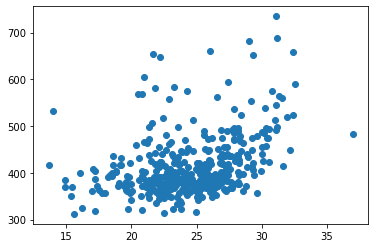

In [103]:
plt.scatter(df["AVERAGE CLASS SIZE"], df["SAT Math Avg. Score"])

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Poglejmo si še demographics dataframe.

V demographics datafram-u obdržite le vrstice za šolsko leto 20112012</div>

In [93]:
demographics =pd.read_csv('./datasets/NYE_SAT_scores_Predavanje_01/demographics_2006_2012.csv', delimiter=",")

In [105]:
demographics.head()
filter3=demographics["schoolyear"]==20112012
demographics_filtered=demographics[filter3]




<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Združite sat_results in demographics dataframes in obdržite le vrstice, ki imajo ne-nične vrednosti.</div>

In [106]:
demographics_filtered.head

<bound method NDFrame.head of           DBN                                              Name  schoolyear  \
6      01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13     01M019  P.S. 019 ASHER LEVY                                 20112012   
20     01M020  PS 020 ANNA SILVER                                  20112012   
27     01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35     01M063  PS 063 WILLIAM MCKINLEY                             20112012   
...       ...                                               ...         ...   
10046  32K549  BUSHWICK SCHOOL FOR SOCIAL JUSTICE                  20112012   
10053  32K552  ACADEMY OF URBAN PLANNING                           20112012   
10060  32K554  ALL CITY LEADERSHIP SECONDARY SCHOOL                20112012   
10067  32K556  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL    20112012   
10074  32K564  BUSHWICK COMMUNITY HIGH SCHOOL                      20112012   

      fl_percent  frl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DBN                10075 non-null  object 
 1   Name               10075 non-null  object 
 2   schoolyear         10075 non-null  int64  
 3   fl_percent         8560 non-null   object 
 4   frl_percent        4482 non-null   float64
 5   total_enrollment   10075 non-null  int64  
 6   prek               4712 non-null   object 
 7   k                  5882 non-null   object 
 8   grade1             5881 non-null   object 
 9   grade2             5851 non-null   object 
 10  grade3             5779 non-null   object 
 11  grade4             5741 non-null   object 
 12  grade5             5777 non-null   object 
 13  grade6             4517 non-null   object 
 14  grade7             4203 non-null   object 
 15  grade8             4085 non-null   object 
 16  grade9             397

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
    Ustvarite korelacijsko matriko (<i> .corr()</i> ) in jo prikažite v obliki "heatmap". Uporabite stolpce:
    
    white_per, 
    black_per, 
    asian_per, 
    hispanic_per, 
    ell_per (english language learners), 
    male_per, 
    female_per
</div>

In [107]:
df2=sat_results.merge(demographics_filtered, how="inner", on="DBN")

In [110]:
import seaborn as sns


df2.columns

In [114]:
df2=df2.drop(columns=['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
                 'Name', 'schoolyear', 'fl_percent', 'frl_percent', 
                 'total_enrollment', 'prek', 'k', 'grade1', 'grade2',
                 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 
                 'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 
                 'ell_num', 'sped_num', 'sped_percent', 'ctt_num',
                 'selfcontained_num', 'asian_num', 'black_num', 
                 'hispanic_num','white_num', 'male_num', 'female_num',])

In [115]:
df2.corr()


,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT_Avg_Score,ell_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
SAT Critical Reading Avg. Score,1.000000,0.882200,0.973012,0.976942,-0.477656,0.423652,-0.226208,-0.366948,0.626583,-0.122928,0.122970
SAT Math Avg. Score,0.882200,1.000000,0.895630,0.956405,-0.211639,0.692285,-0.387669,-0.350294,0.622027,-0.025272,0.025328
SAT Writing Avg. Score,0.973012,0.895630,1.000000,0.982189,-0.427277,0.452754,-0.278918,-0.341496,0.651950,-0.161909,0.161959
SAT_Avg_Score,0.976942,0.956405,0.982189,1.000000,-0.376445,0.545374,-0.310319,-0.363118,0.651927,-0.103465,0.103516
ell_percent,-0.477656,-0.211639,-0.427277,-0.376445,1.000000,0.190349,-0.367061,0.364454,-0.146719,0.117713,-0.117691
asian_per,0.423652,0.692285,0.452754,0.545374,0.190349,1.000000,-0.428334,-0.326990,0.332651,0.041053,-0.041014
black_per,-0.226208,-0.387669,-0.278918,-0.310319,-0.367061,-0.428334,1.000000,-0.584439,-0.416216,0.007078,-0.007089
hispanic_per,-0.366948,-0.350294,-0.341496,-0.363118,0.364454,-0.326990,-0.584439,1.000000,-0.310598,0.007672,-0.007706
white_per,0.626583,0.622027,0.651950,0.651927,-0.146719,0.332651,-0.416216,-0.310598,1.000000,-0.068892,0.068930
male_per,-0.122928,-0.025272,-0.161909,-0.103465,0.117713,0.041053,0.007078,0.007672,-0.068892,1.000000,-1.000000


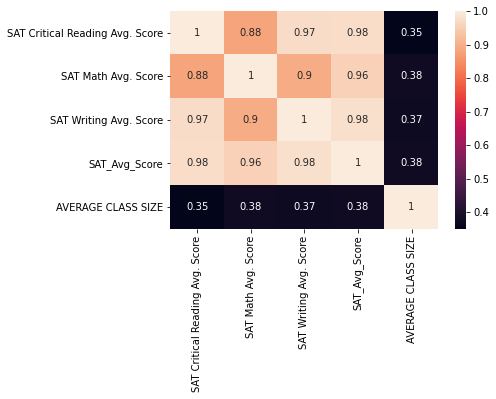

In [117]:
sns.heatmap(df.corr(), annot=True)

In [113]:
df2.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'SAT_Avg_Score', 'Name', 'schoolyear',
       'fl_percent', 'frl_percent', 'total_enrollment', 'prek', 'k', 'grade1',
       'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8',
       'grade9', 'grade10', 'grade11', 'grade12', 'ell_num', 'ell_percent',
       'sped_num', 'sped_percent', 'ctt_num', 'selfcontained_num', 'asian_num',
       'asian_per', 'black_num', 'black_per', 'hispanic_num', 'hispanic_per',
       'white_num', 'white_per', 'male_num', 'male_per', 'female_num',
       'female_per'],
      dtype='object')

TypeError: '<=' not supported between instances of 'str' and 'float'